In [2]:
! jupyter nbconvert --to script utils.ipynb


[NbConvertApp] Converting notebook utils.ipynb to script
[NbConvertApp] Writing 6511 bytes to utils.py


In [15]:
import import_ipynb
import nbimporter
import utils
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install import-ipynb


In [2]:
! jupyter nbconvert dashboard.ipynb --to python

[NbConvertApp] Converting notebook dashboard.ipynb to python
[NbConvertApp] Writing 6952 bytes to dashboard.py


## Usage examples (synthetic experiments on the lattice)

In order to replicate similar results to those proposed in the main paper, you can run BROT in its configurations on the lattice network. This can be simply done with the magic command #1.
In order to compare the solutions of BROT (i.e. those extracted from the bilevel optimization routine) with those computed with the PSGD scheme, or integrating the OT ODEs, one can run the magic commands #2 and #3 respectively. Here below, the dropout probability is set to $q=1$, and can be changed by inputting it as a parameter (```-mask```) of ```main.py```.

In [16]:
# Configuration #1: BROT
print("*** RUNNING BROT ***")
%run main.py -V 0 -Vtime 1 -topol "lattice" -whichinflow "lattice" -sw 0
print("\n")

# Configuration #2: PSGD
print("*** RUNNING PSGD ***")
%run main.py -V 0 -Vtime 1 -topol "lattice" -whichinflow "lattice" -OTex 0 -sw 0
print("\n")

# Configuration #3: OT
print("*** RUNNING OT ***")
%run main.py -V 0 -Vtime 1 -topol "lattice" -whichinflow "lattice" -GDex 0

*** RUNNING BROT ***
[ START ]
============================================================| START
elapsed time = 1.0716891288757324 [s]
elapsed time = 0.0 [s]
============================================================| STOP
[ END ]


*** RUNNING PSGD ***
[ START ]
============================================================| START
elapsed time = 0.2878730297088623 [s]
elapsed time = 0.2975618839263916 [s]
============================================================| STOP
[ END ]


*** RUNNING OT ***
[ START ]
============================================================| START
elapsed time = 0.1754438877105713 [s]
elapsed time = 0.0 [s]
============================================================| STOP
[ END ]


## Plot results

Compiling the following cells you can unpack and plot some preliminary results. Particularly:
1. plot network with fluxes at convergence 
2. plot network with cost difference at convergence
3. plot the optimal transport cost $J$ and the and $\Omega$ at convergence

In [17]:
def unpack_results(OUTPUT_PATH):
    
    
    from os import listdir
    from os.path import isfile, join
    import pickle as pkl
    
    file_names = [f for f in listdir(OUTPUT_PATH) if isfile(join(OUTPUT_PATH, f))]
    
    for file in file_names:
        if "OTexec_True_GDexec_True" in file:
            if "metadata" in file:
                metadata_BROT = pkl.load(open(OUTPUT_PATH + file, "rb"))
            if "results" in file:
                results_BROT = pkl.load(open(OUTPUT_PATH + file, "rb"))
        if "OTexec_True_GDexec_False" in file:
            if "metadata" in file:
                metadata_OT = pkl.load(open(OUTPUT_PATH + file, "rb"))
            if "results" in file:
                results_OT = pkl.load(open(OUTPUT_PATH + file, "rb"))
        if "OTexec_False_GDexec_True" in file:
            if "metadata_OT" in file:
                metadata_PSGD = pkl.load(open(OUTPUT_PATH + file, "rb"))
            if "results_OT_" in file:
                results_PSGD = pkl.load(open(OUTPUT_PATH + file, "rb"))

    print(results_BROT.keys())
    
    metadata = {"BROT": metadata_BROT, "PSGD": metadata_PSGD, "OT": metadata_OT}
    results = {"BROT": results_BROT, "PSGD": results_PSGD, "OT": results_OT}

    return metadata, results

In [18]:
OUTPUT_PATH = "./data/output/"

# structure of output dicts is {X: metadata(X)} and  {X: results(X)}, with X = BROT, PSGD, OT
metadata, results = unpack_results(OUTPUT_PATH) #utils.unpack_results(OUTPUT_PATH)

dict_keys(['Jevol', 'Omegaevol', 'muevol', 'wevol', 'Fevol', 'psievol', 'network', 'forcing', 'commodities'])


In [19]:
results

{'BROT': {'Jevol': np.float64(0.4668276328447155),
  'Omegaevol': np.float64(0.024542298596192145),
  'muevol': array([[3.81589517e-13],
         [1.31600397e-19],
         [2.50712833e-13],
         [1.21676174e-18],
         [2.65492986e-13],
         [7.59542673e-14],
         [9.52518853e-15],
         [5.30102527e-18],
         [2.47938475e-13],
         [1.82818243e-13],
         [1.15635647e-13],
         [2.30772093e-19],
         [1.39043087e-19],
         [2.25978651e-13],
         [1.45858975e-18],
         [5.63308575e-11],
         [5.69280007e-11],
         [2.52864959e-19],
         [2.13119468e-07],
         [2.13064288e-07],
         [2.13183863e-07],
         [1.92578804e-17],
         [6.55246441e-11],
         [1.68241318e-16],
         [2.13183921e-07],
         [6.77171779e-16],
         [1.52702044e-09],
         [1.10823968e-18],
         [2.11664578e-07],
         [1.52745541e-09],
         [2.04745744e-19],
         [5.72108015e-11],
         [7.60844181e-17],

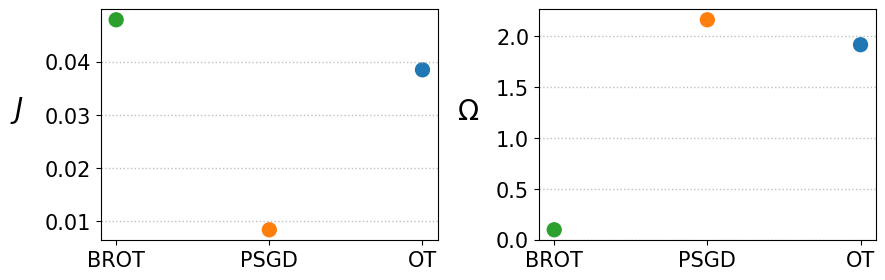

In [20]:
utils.plot_J_Omega(results)


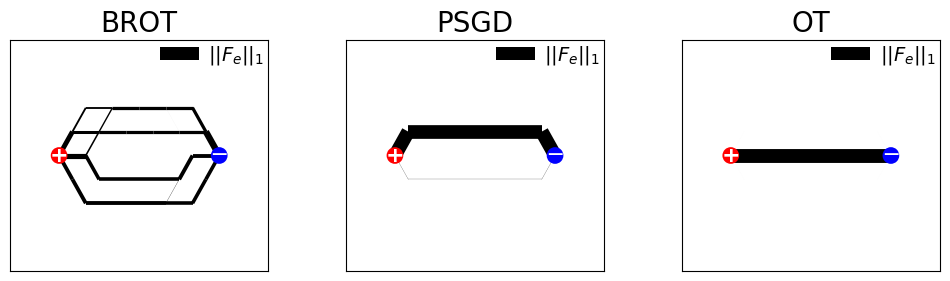

In [11]:
G = results["OT"]["network"] # network
commodities = results["OT"]["commodities"] # OD nodes
norm_S = 0.5 # S is not normalized in input

F_BROT = abs(results["BROT"]["Fevol"]).T[0]/norm_S
F_PSGD = abs(results["PSGD"]["Fevol"]).T[0]/norm_S
F_OT = abs(results["OT"]["Fevol"]).T[0]/norm_S


    
fig, ax = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    
utils.plot_network_F(G, commodities, F_BROT, ax[0], title="BROT")
utils.plot_network_F(G, commodities, F_PSGD, ax[1], title="PSGD")
utils.plot_network_F(G, commodities, F_OT, ax[2], title="OT")

# Please note, assymmetric in fluxes is due to the noise added to w.
# To obtain symmetric networks, one should average over a large number of samples.

rho_X := w_X - w_OT, with X = BROT, GD


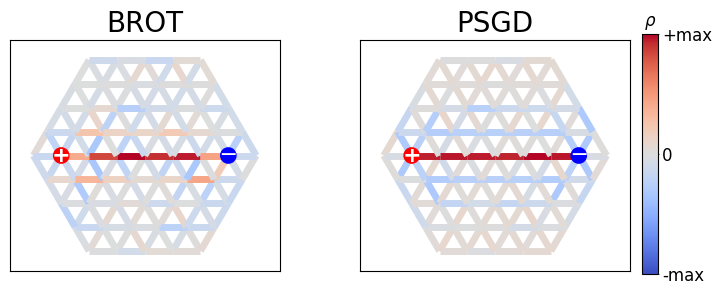

In [12]:
    w_OT = abs(results["OT"]["wevol"]).T
    norm_w = np.sum(w_OT) # results in code are serialized in OT units
    rho_BROT = (abs(results["BROT"]["wevol"]).T - w_OT)/norm_w
    rho_PSGD = (abs(results["PSGD"]["wevol"]).T - w_OT)/norm_w
    fig, ax = plt.subplots(1,2, figsize=(8,3))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

    utils.plot_network_w(G, commodities, rho_BROT, ax[0], title="BROT")
    utils.plot_network_w(G, commodities, rho_PSGD, ax[1], title="PSGD")
    utils.plot_colorbar(fig, rho_BROT, ax[1])

    # Please note, assymmetric in fluxes is due to the noise added to w
    # To obtain symmetric networks, one should average over a large number of samples
    # Also, each cost difference is normalized w.r.t to its maximum

w_OT shape: (156,)
results['BROT']['wevol'] shape: (156,)
norm_w: 19.5
rho_BROT shape: (156,)
rho_BROT values: [-1.67485894e-04  2.62884666e-04 -8.46767208e-05  4.71170916e-06
 -5.02775612e-04 -3.21278310e-06 -2.26288058e-04  3.98001576e-04
  2.49104936e-04 -3.22899238e-04  2.00162164e-04 -1.32814763e-05
  7.52929008e-05  3.53685137e-04 -5.82161362e-04 -8.61880931e-04
 -1.25650432e-03  3.92759979e-04 -3.07378434e-04 -1.18376016e-04
 -1.64372949e-04  2.53461503e-04 -3.38382002e-04  1.61981774e-04
 -1.30341082e-03  6.90464382e-05 -8.06942115e-04  5.38970884e-04
 -6.63929006e-04 -7.24342732e-04 -3.33126246e-04 -4.05688606e-04
 -1.86698714e-04 -1.10775490e-04 -1.74084107e-03  1.15637896e-04
 -2.23080315e-04  2.34830078e-05  1.86908779e-04 -1.91150518e-04
 -6.91298276e-04 -3.69667559e-04  3.70969509e-05 -1.02613253e-03
 -1.41276631e-05  1.17730478e-04 -1.29692227e-03 -7.90250218e-04
 -2.67863014e-04 -2.94184415e-04 -8.10737836e-04 -9.07409552e-04
  5.00642675e-04 -6.04434971e-04 -3.87809803

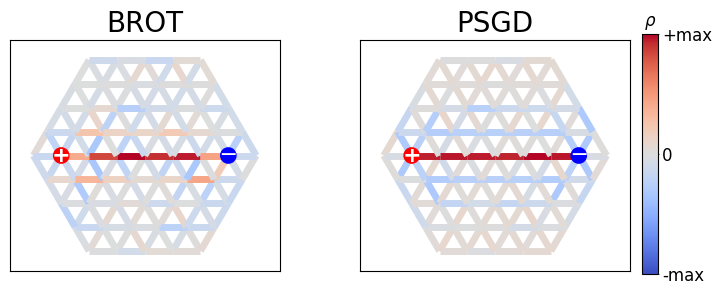

In [13]:
# Assuming results is a dictionary containing necessary data
w_OT = abs(results["OT"]["wevol"]).T  # Take absolute value and transpose
norm_w = np.sum(w_OT)  # Normalize by the sum of OT's wevol

# Debugging: Check the values and shape of w_OT
print("w_OT shape:", w_OT.shape)


# Calculate rho_BROT
rho_BROT = (abs(results["BROT"]["wevol"]).T - w_OT) / norm_w

# Debugging: Check the values and shape of results["BROT"]["wevol"] and rho_BROT
print("results['BROT']['wevol'] shape:", abs(results["BROT"]["wevol"]).T.shape)

print("norm_w:", norm_w)
print("rho_BROT shape:", rho_BROT.shape)
print("rho_BROT values:", rho_BROT)

# Calculate rho_PSGD similarly
rho_PSGD = (abs(results["PSGD"]["wevol"]).T - w_OT) / norm_w

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Plot using the utils.plot_network_w function
utils.plot_network_w(G, commodities, rho_BROT, ax[0], title="BROT")
utils.plot_network_w(G, commodities, rho_PSGD, ax[1], title="PSGD")
utils.plot_colorbar(fig, rho_BROT, ax[1])

# Please note, assymmetric in fluxes is due to the noise added to w
# To obtain symmetric networks, one should average over a large number of samples
# Also, each cost difference is normalized w.r.t to its maximum


In [16]:
! pip install numpy==1.23.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 28.0 MB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_proce

In [17]:
! pip list

Package                   Version
------------------------- --------------
anyio                     4.4.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
certifi                   2024.6.2
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
Flask                     3.0.3
Flask-SQLAlchemy          3.1.1
fonttools                 4.53.1
fqdn                      1.5.1
h11              

In [18]:
! pip install --upgrade networkx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.6
    Uninstalling networkx-2.8.6:
      Successfully uninstalled networkx-2.8.6


In [28]:
# Check the current version of NumPy
import numpy as np

np.__version__


'2.0.1'